In [1]:
from src import *
from functools import partial
import random
import time
from pprint import pprint
import matplotlib.pyplot as plt

In this experiment, I will compare the different algorithms on how well they deduce ancestor/descendent relationships from parent/child relationships. Note that this differs from the general path finding problem because the network will be a tree. This cuts the computational complexity by a lot and means there is no way for backward chaining to get "stuck."

In [2]:
X, Y, Z = variables("XYZ")

class Family:
    def __init__(self, table, n_members):
        self.n_members = n_members
        self.tb = table
        
        self.parent = functor("parent")
        self.ancestor = functor("ancestor")
        
        self.write_rules()
        self.write_connections()
    
    def write_rules(self):
        self.tb.tell(self.ancestor(X, Y) <= self.parent(X, Y))
        self.tb.tell(self.ancestor(X, Y) <= self.parent(Z, Y) & self.ancestor(X, Z))
    
    def member(self, n):
        return Term(f"person_{n}")
    
    def write_connections(self):
        for i in range(1, self.n_members):
            self.tb.tell(self.parent(self.member(i), self.member(random.randint(0, i))))

In [3]:
data = {}
runs = 3
n_fams = list(range(4, 13, 2))

algos = [partial(bc_ask, patience=10), fc_ask, partial(id_ask, patience=10)]
names = ["bounded backward chaining", "forward chaining", "iterative deepening"]

for alg, name in zip(algos, names):

    data[name] = []
    random.seed(348)

    for family_size in n_fams:
        t = time.time()

        for _ in range(runs):
            fam = Family(LinearTable(), family_size)
            list(alg(fam.tb, fam.ancestor(fam.member(family_size - 1), X)))

        data[name].append((time.time() - t) / runs)

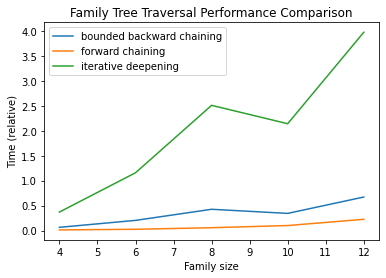

In [7]:
for name, times in data.items():
    plt.plot(n_fams, times, label=name)

plt.legend()
plt.ylabel("Time (relative)")
plt.xlabel("Family size")
plt.title("Family Tree Traversal Performance Comparison")
plt.show()